# **3.4 Independence, Basis, and Dimension**


- Every vector in the space can be written **uniquely** as a linear combination of a basis.
- Four essential principles:
  1. **Independence** — no redundant vectors  
  2. **Spanning** — enough vectors to generate the whole space  
  3. **Basis** — independent + spanning  
  4. **Dimension** — number of vectors in a basis  


### **Linear Independence**
    
**Definition:**  
The columns of $A$ are **linearly independent** when the only solution to  
$$
Ax = 0
$$  
is  
$$
x = 0.
$$  

Equivalent statement for vectors $v_1, \dots, v_n$:
$$
x_1 v_1 + x_2 v_2 + \cdots + x_n v_n = 0
$$
implies  
$$
x_1 = x_2 = \cdots = x_n = 0.
$$

- If a non-zero combination gives $0$, the vectors are **dependent**.
- **Full column rank:** columns are independent ⇔ rank $r = n$  
  → no free variables, nullspace contains only $0$.
- Any set of **more than $m$ vectors in $\mathbb{R}^m$** is automatically dependent.


In [1]:
import numpy as np

def is_linearly_independent(A, tol=1e-12):
    """
    Checks if the column vectors of A are linearly independent.
    Returns True/False.
    """
    A = np.array(A, dtype=float)

    # Rank equals number of columns → independent
    r = np.linalg.matrix_rank(A, tol=tol)
    return r == A.shape[1]

A = [
    [1, 2, 3],
    [0, 1, 1],
    [0, 0, 0]
]

print(is_linearly_independent(A))  # False


B = [
    [1, 0, 2],
    [0, 1, -1],
    [0, 0, 1]
]

print(is_linearly_independent(B))  # True

False
True


### **Vectors That Span a Subspace**

- The column space $C(A)$ contains **all combinations** $Ax$.
- **Definition:** A set of vectors **spans** a space if their linear combinations fill that space.

Row-space viewpoint:
- Combinations of rows produce the **row space**.
- **Definition:** The row space of $A$ is the subspace of $\mathbb{R}^n$ spanned by the rows.  
- Row space of $A$ = column space of $A^T$:  
  $$
  \text{Row}(A) = C(A^T)
  $$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def visualize_span(vectors, scale=1.5, density=10):
    """
    Visualizes vectors that span a subspace (2D or 3D).
    """
    V = np.array(vectors, dtype=float).T  # (dim, k)
    dim, k = V.shape

    if dim not in (2, 3):
        raise ValueError("Only 2D and 3D visualization supported.")

    # 2D CASE
    if dim == 2:
        # Grid
        a = np.linspace(-scale, scale, density)
        b = np.linspace(-scale, scale, density)
        A, B = np.meshgrid(a, b)

        # If only 1 vector, treat it as a line span
        if k == 1:
            P = A * V[:, 0][:, None, None]
        else:
            P = A * V[:, 0][:, None, None] + B * V[:, 1][:, None, None]

        plt.figure(figsize=(6, 6))

        # FIX: quiver must receive matching X,Y,U,V arrays
        x0 = np.zeros(k)
        y0 = np.zeros(k)
        u = V[0]
        v = V[1]

        plt.quiver(x0, y0, u, v, angles="xy", scale_units="xy", scale=1, color="red")

        plt.scatter(P[0], P[1], s=5)
        plt.axhline(0, linewidth=0.5)
        plt.axvline(0, linewidth=0.5)
        plt.gca().set_aspect("equal", adjustable="box")
        plt.title("Span Visualization (2D)")
        plt.show()
        return

    # 3D CASE
    if dim == 3:
        a = np.linspace(-scale, scale, density)
        b = np.linspace(-scale, scale, density)
        A, B = np.meshgrid(a, b)

        v1 = V[:, 0]
        v2 = V[:, 1] if k > 1 else np.zeros(3)

        P = A * v1[:, None, None] + B * v2[:, None, None]

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        # FIX: Proper broadcasting for quiver
        x0 = np.zeros(k)
        y0 = np.zeros(k)
        z0 = np.zeros(k)
        u = V[0]
        v = V[1]
        w = V[2]

        ax.quiver(x0, y0, z0, u, v, w, length=1, normalize=False, color="red")
        ax.plot_surface(P[0], P[1], P[2], alpha=0.3)

        ax.set_title("Span Visualization (3D)")
        plt.show()


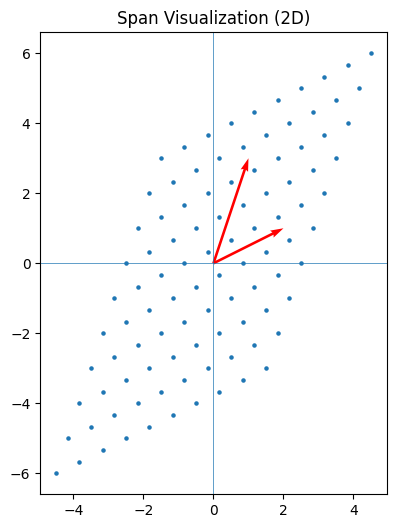

In [14]:
vectors = [
    [2, 1],
    [1, 3]
]

visualize_span(vectors)

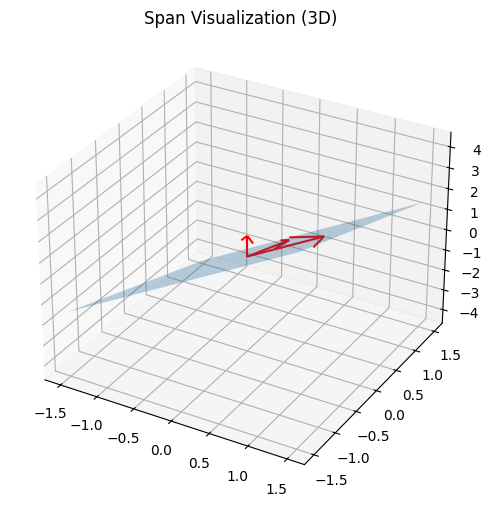

In [15]:
vectors = [
    [1, 0, 2],
    [0, 1, -1],
    [0, 0, 1]
]

visualize_span(vectors)

### **Basis for a Vector Space**

**Definition:**  
A **basis** is a sequence of vectors that are:

1. Linearly independent  
2. Spanning the space  

Consequences:
- Every vector has **one and only one** representation using the basis.
- $v_1,\dots,v_n$ form a basis for $\mathbb{R}^n$ iff they are the columns of an invertible $n \times n$ matrix.
- Pivot columns of $A$ → basis for the **column space**.  
- Pivot rows of $A$ (or of $R$) → basis for the **row space**.
- Number of basis vectors = **dimension**.

    
### **Dimension of a Vector Space**

If two sets of vectors $v_1,\dots,v_m$ and $w_1,\dots,w_n$ are both bases for the same space, then:
$$
m = n.
$$  

**Definition:**  
The **dimension** is the number of vectors in every basis for the space.



### **Bases for Matrix Spaces and Function Spaces**

**Example: All $2 \times 2$ matrices**

The space $M$ of all $2 \times 2$ matrices has dimension **4**.

One basis:

$$
A_1 = \begin{bmatrix}1 & 0 \\ 0 & 0\end{bmatrix}, \quad
A_2 = \begin{bmatrix}0 & 1 \\ 0 & 0\end{bmatrix}, \quad
A_3 = \begin{bmatrix}0 & 0 \\ 1 & 0\end{bmatrix}, \quad
A_4 = \begin{bmatrix}0 & 0 \\ 0 & 1\end{bmatrix}
$$

Any matrix
$$
A = \begin{bmatrix} c_1 & c_2 \\ c_3 & c_4 \end{bmatrix}
$$
can be written as:
$$
A = c_1 A_1 + c_2 A_2 + c_3 A_3 + c_4 A_4.
$$

Since the only combination that gives the zero matrix is with $c_1=c_2=c_3=c_4=0$, the matrices are independent.

**Matrix Space Dimensions**

- All $n \times n$ matrices:  
  $$
  \dim = n^2
  $$
- Upper triangular matrices:  
  $$
  \dim = \frac{1}{2}(n^2) + \frac{1}{2}n
  $$
- Diagonal matrices:  
  $$
  \dim = n
  $$
- Symmetric matrices:  
  $$
  \dim = \frac{1}{2}(n^2) + \frac{1}{2}n
  $$


**Key Ideas**

1. Columns of $A$ are independent ⇔ $Ax=0$ has only the trivial solution.  
2. Vectors span a space if their combinations fill the entire space.  
3. A basis is independent + spanning; representations are unique.  
4. All bases have the same number of vectors → **dimension**.  
5. Pivot columns form a basis for the column space; dimension = rank $r$.
